In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import acquire
import prepare
import explore
import modeling

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Set figure size and figure size for all plots
plt.rc("figure", figsize = (16,16))
plt.rc("font", size=14)

# Allow all columns to be displayed
pd.set_option('display.max_columns', None)

In [2]:
df = acquire.acquire_data()
df

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1


In [3]:
# summarize_missing_data = prepare.percent_nans(df)
# summarize_missing_data

In [4]:
column_list= ['h1n1_concern','h1n1_knowledge', 
       'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective',
       'opinion_seas_risk',
       'opinion_seas_sick_from_vacc',
       'household_adults',
       'household_children']

In [5]:
h1n1_train, h1n1_test, seasonal_train, seasonal_test = prepare.prepare_data(df, column_list)

                         column n_nans  percentage_nans
36             seasonal_vaccine      0         0.000000
30                   census_msa      0         0.000000
29               hhs_geo_region      0         0.000000
24                          sex      0         0.000000
23                         race      0         0.000000
21                    age_group      0         0.000000
35                 h1n1_vaccine      0         0.000000
4          behavioral_face_mask     19         0.071142
5         behavioral_wash_hands     42         0.157262
2     behavioral_antiviral_meds     71         0.265848
7       behavioral_outside_home     82         0.307036
6   behavioral_large_gatherings     87         0.325757
0                  h1n1_concern     92         0.344479
1                h1n1_knowledge    116         0.434343
8         behavioral_touch_face    128         0.479275
3          behavioral_avoidance    208         0.778822
32           household_children    249         0

### The final dataframe has 26,706 observations and 34 columns before being separated into seasonal and h1h1 dataframes for exploration

In [6]:
h1n1_train

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine,encoded_employment_status,encoded_rent_or_own,encoded_marital_status,encoded_sex,age_group_18_-_34_years,age_group_35_-_44_years,age_group_45_-_54_years,age_group_55_-_64_years,age_group_65+_years,education_12_years,education_<_12_years,education_college_graduate,education_some_college,"income_poverty_<=_$75,000,_above_poverty","income_poverty_>_$75,000",income_poverty_below_poverty,race_black,race_hispanic,race_other_or_multiple,race_white,hhs_geo_region_atmpeygn,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,h1n1_concern_scaled,h1n1_knowledge_scaled,opinion_h1n1_vacc_effective_scaled,opinion_h1n1_risk_scaled,opinion_h1n1_sick_from_vacc_scaled,opinion_seas_vacc_effective_scaled,opinion_seas_risk_scaled,opinion_seas_sick_from_vacc_scaled,household_adults_scaled,household_children_scaled
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
22067,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,4.0,1.0,2.0,4.0,2.0,2.0,65+ Years,College Graduate,White,Male,"> $75,000",Married,Own,Not in Labor Force,lzgpxyit,"MSA, Not Principle City",1.0,0.0,0,1,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333333,0.5,0.75,0.00,0.25,0.75,0.25,0.25,0.333333,0.000000
2876,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,5.0,4.0,5.0,5.0,4.0,2.0,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Not Married,Rent,Employed,bhuqouqj,"MSA, Principle City",0.0,0.0,0,0,1,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.5,1.00,0.75,1.00,1.00,0.75,0.25,0.000000,0.000000
22939,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,3.0,4.0,2.0,4.0,2.0,2.0,45 - 54 Years,College Graduate,Other or Multiple,Female,"> $75,000",Married,Rent,Employed,mlyzmhmf,Non-MSA,2.0,1.0,0,0,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.666667,0.5,0.50,0.75,0.25,0.75,0.25,0.25,0.666667,0.333333
4154,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,1.0,1.0,5.0,1.0,1.0,45 - 54 Years,< 12 Years,Other or Multiple,Male,"> $75,000",Married,Rent,Employed,mlyzmhmf,"MSA, Principle City",1.0,0.0,0,0,1,0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.5,0.75,0.00,0.00,1.00,0.00,0.00,0.333333,0.000000
23434,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,65+ Years,12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,0.0,0,1,0,1,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.5,0.75,0.25,0.25,0.75,0.75,0.25,0.333333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0

In [7]:
seasonal_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21365 entries, 22862 to 7566
Data columns (total 74 columns):
h1n1_concern                                21365 non-null float64
h1n1_knowledge                              21365 non-null float64
behavioral_antiviral_meds                   21365 non-null float64
behavioral_avoidance                        21365 non-null float64
behavioral_face_mask                        21365 non-null float64
behavioral_wash_hands                       21365 non-null float64
behavioral_large_gatherings                 21365 non-null float64
behavioral_outside_home                     21365 non-null float64
behavioral_touch_face                       21365 non-null float64
doctor_recc_h1n1                            21365 non-null float64
doctor_recc_seasonal                        21365 non-null float64
chronic_med_condition                       21365 non-null float64
child_under_6_months                        21365 non-null float64
health_worker    

In [8]:
percent_vaccinated = (h1n1_train.h1n1_vaccine.value_counts()[1]/h1n1_train.shape[0])*100
percent_vaccinated

21.245026913175753

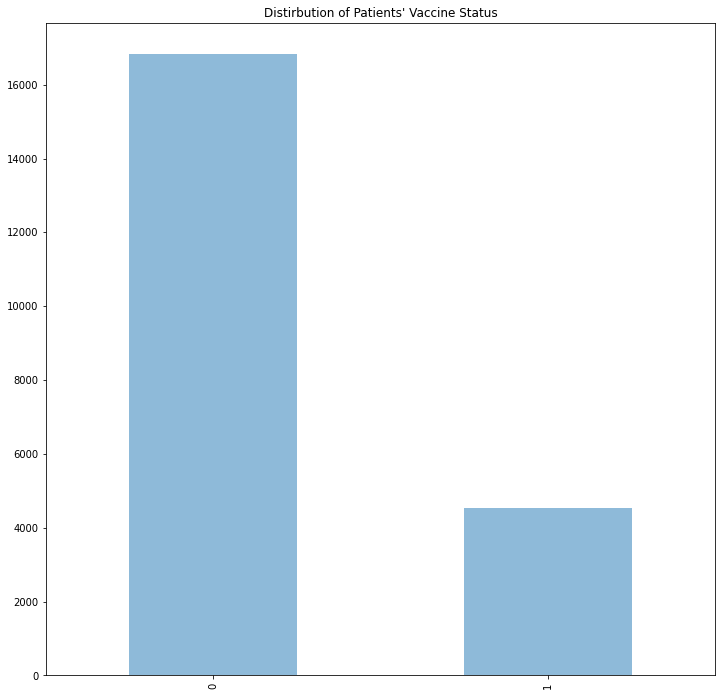

In [9]:
explore.distribution_of_h1n1_vaccine_status(h1n1_train)

### Key Takeaway^^
- Visual depiction of the fact that only 21% of the participants were vaccinated. Also important to note that when we did the train test split, we stratified the y variable, meaning the same proportion of people were vaccinated in the whole data set is equal to the proportion of vaccinated people in our training set. 

- Let's look at how certain demographic features relate to the overall vacination rate

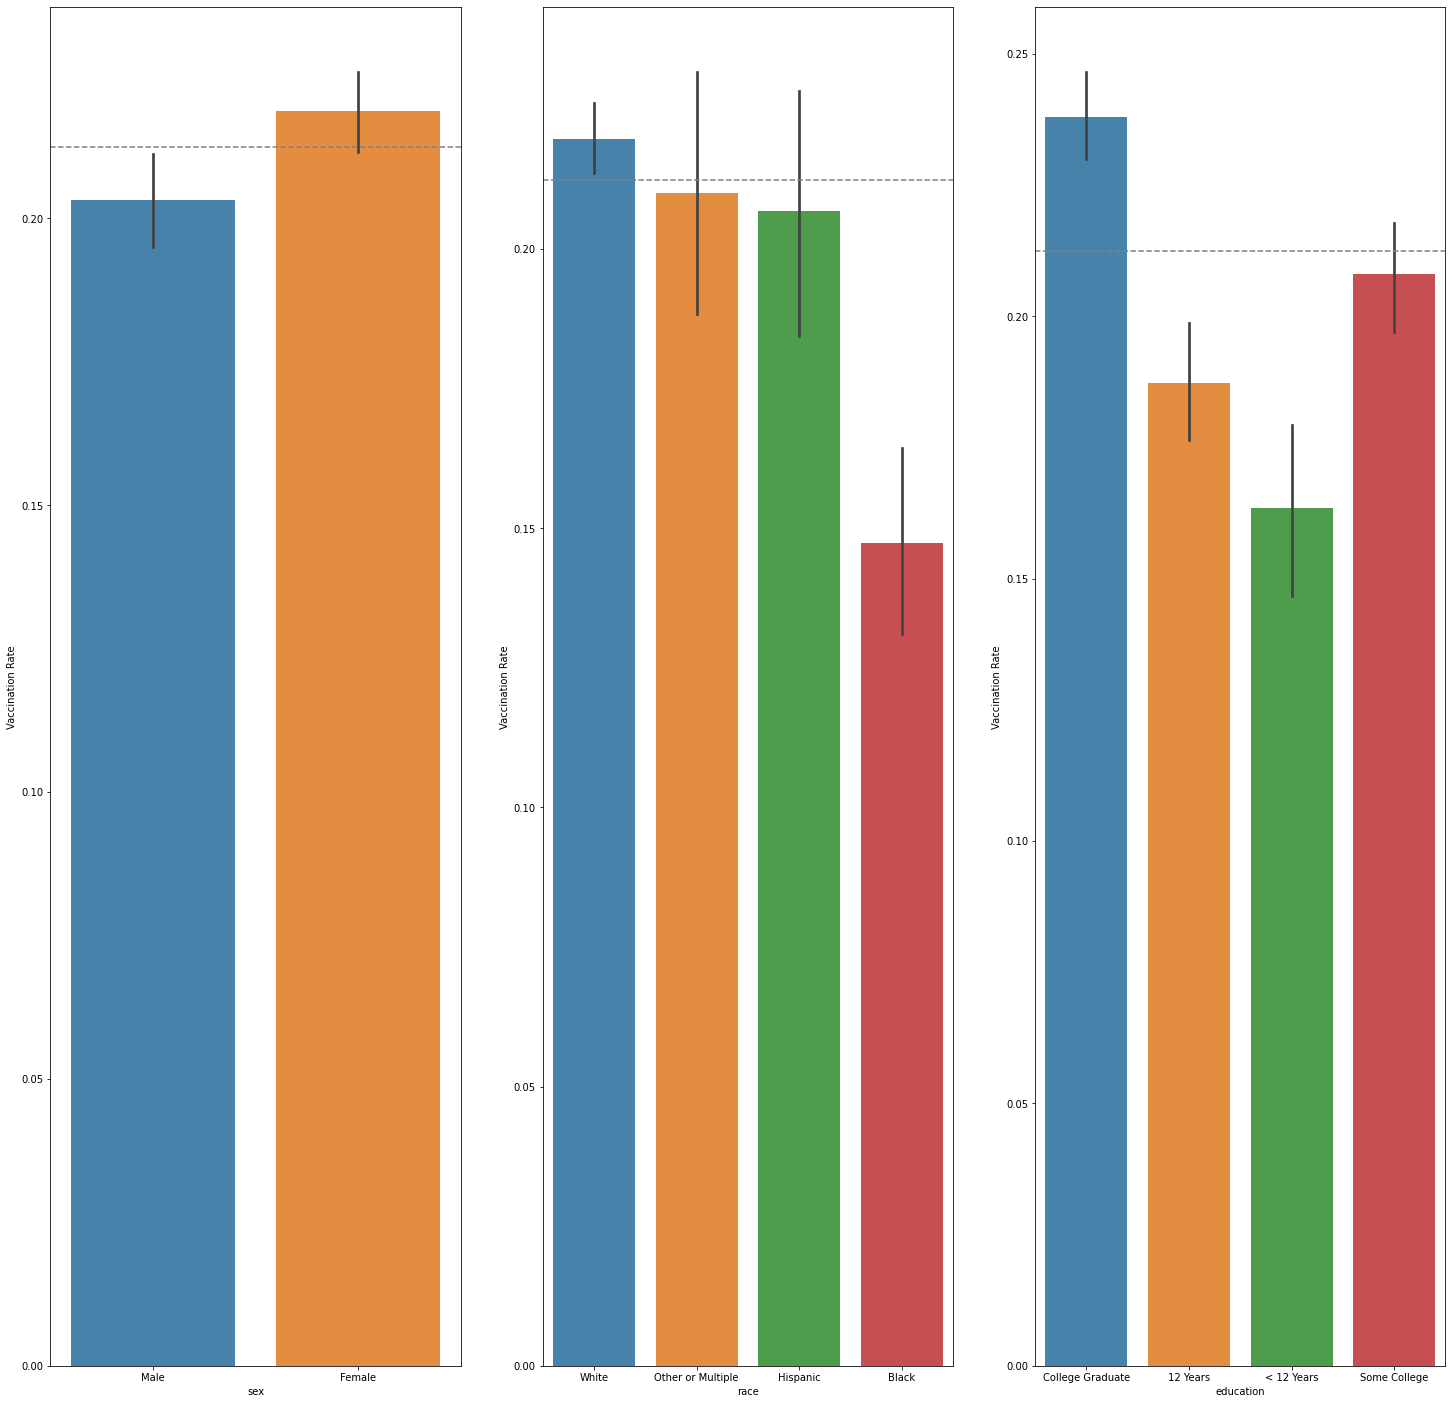

In [10]:
explore.sex_race_education_h1n1(h1n1_train)

### Key Takeaway ^^
- From these basic barplots, it looks like college graduated, white women get vaccinated above the average vaccination rate

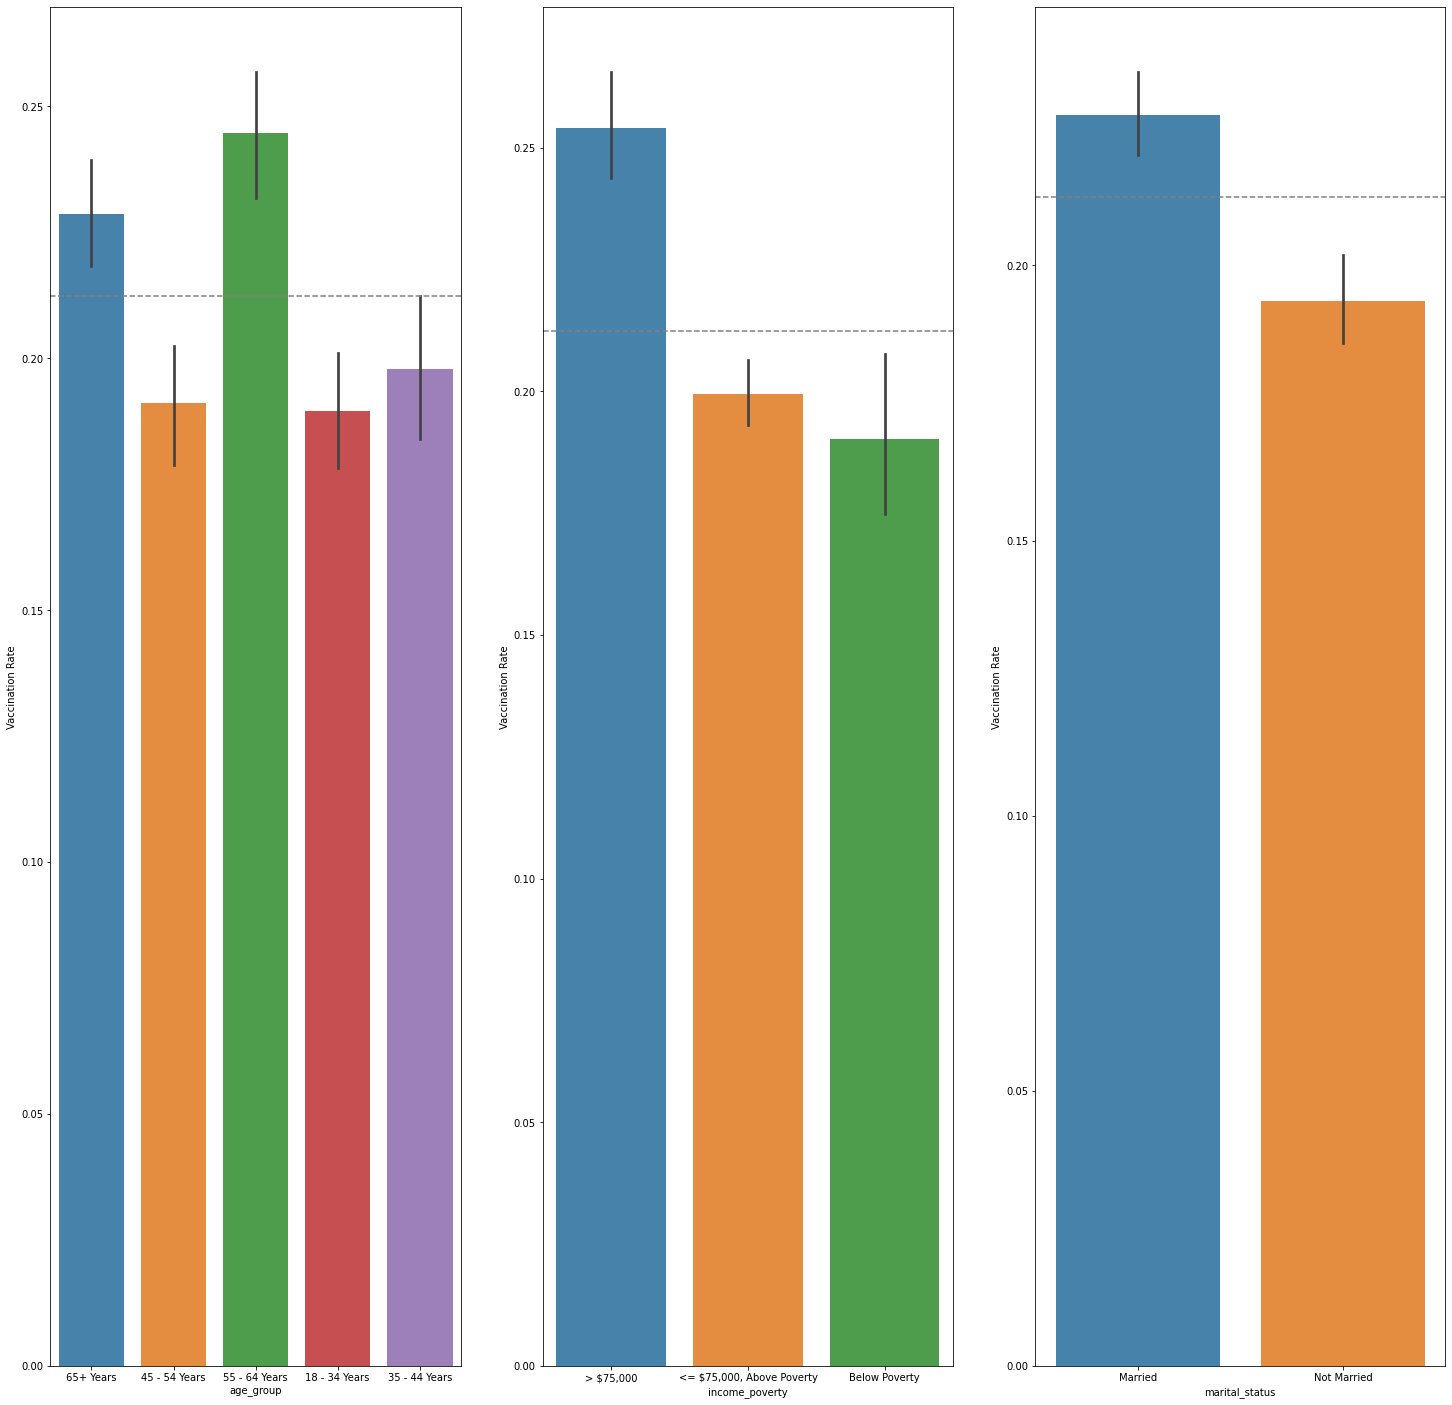

In [11]:
explore.age_income_marital_status(h1n1_train)

### Keytakeaway^^
- People who are over the age of 55 who make more than 75k a year, and who are married get this vaccine above the average vaccination rate

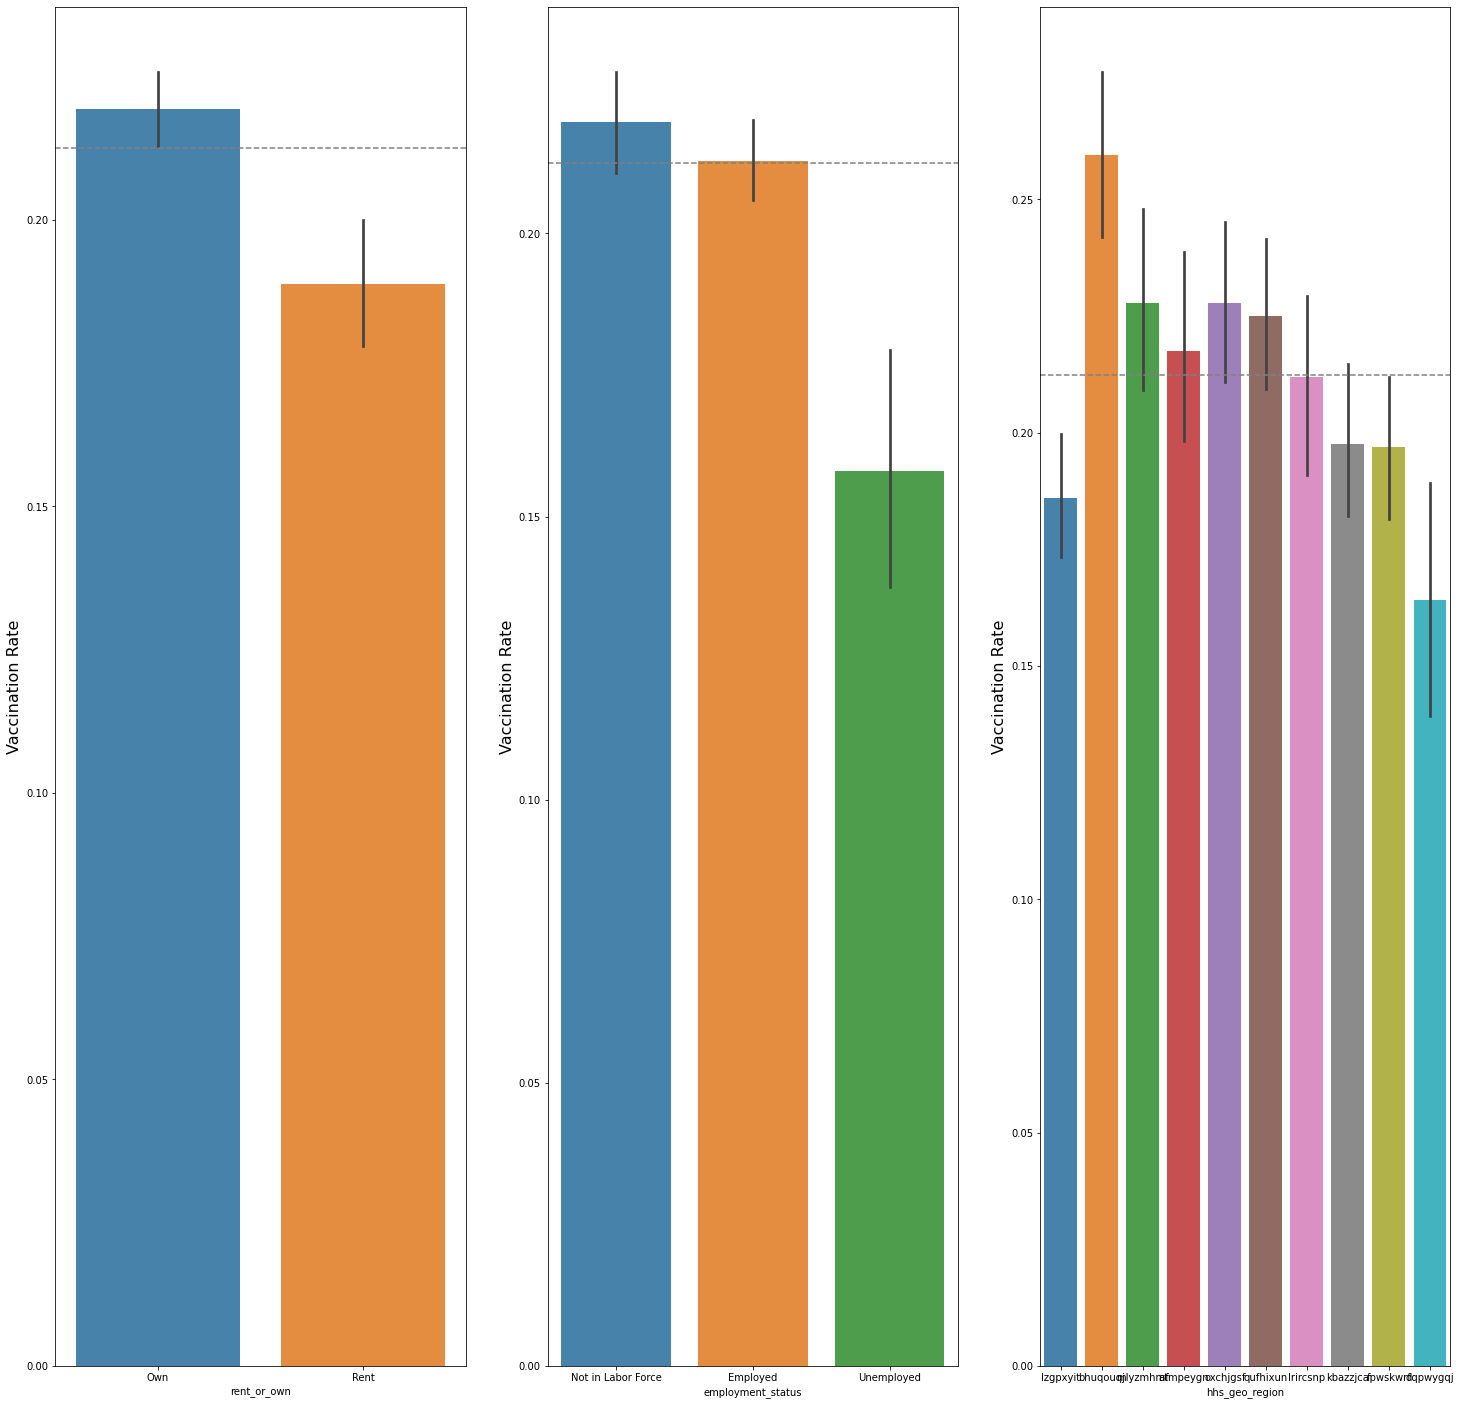

In [12]:
explore.rent_employment_geo(h1n1_train)

### Keytakeaway^^
- People who own their home, who are not in the labor force, and who live in five specific areas are have a higher than average vaccination rate

## Hypothesis Testing

Lest start by establishing a coonfidence level. Essentially, in order for something to be declared statstically significant, it must have a confidence level of 95%

alpha ($\alpha$): 1 - confidence level (95% confidence level -> $\alpha = .05$)

Is whether or not a person gets the H1N1 shot independent of their opinion of their risk of getting the disease?

### First Hypothesis:
- $H_0$: Getting the H1N11 flu shot is independent of their opinion of risk of getting the flu
- $H_a$: Getting the H1N11 flu shot is dependent on their opinion on risk of getting the flu

In [13]:
explore.chi_square_opinion_status(h1n1_train)

Observed

[[5919 6818  741 2667  681]
 [ 580 1401  163 1680  715]]
---
Expected

[[5118.28570091 6472.87123801  711.9449567  3423.47868008 1099.41942429]
 [1380.71429909 1746.12876199  192.0550433   923.52131992  296.58057571]]
---

chi^2 = 2218.1825
p     = 0.0000

        Because p (0.0000) is less than alpha (0.05), we reject the null hypothesis.
        This means that the chances of observing the relationship between 
        opinion and vaccine status due to chance are slim. 
        


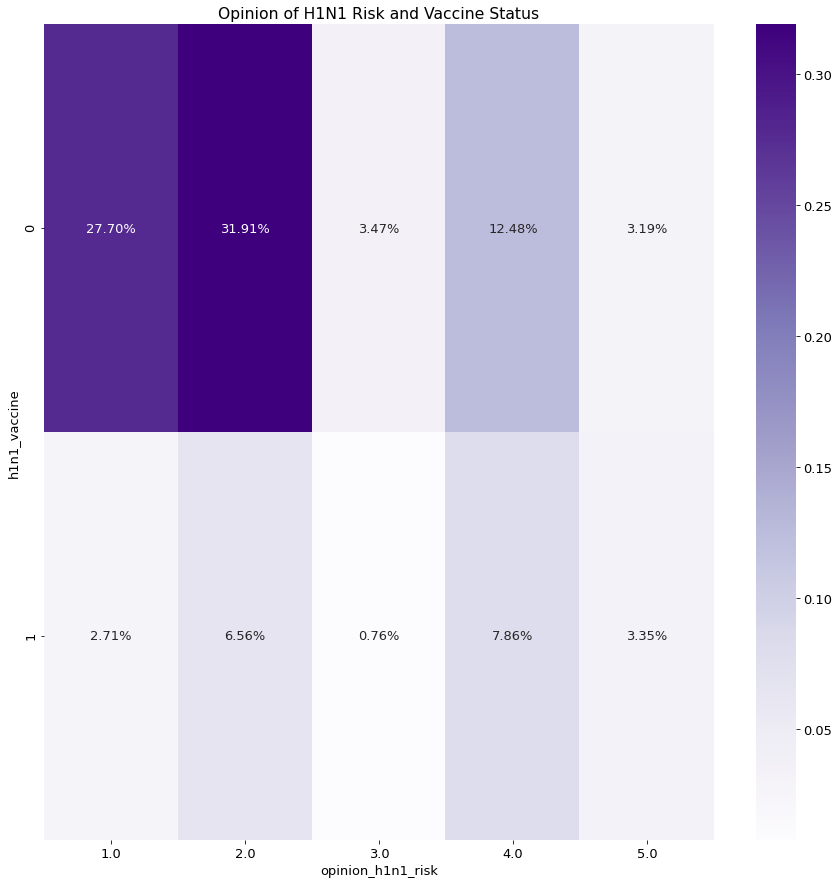

In [14]:
explore.opinion_h1n1_status(h1n1_train)